In [56]:
# -*- coding: utf-8 -*-
# EDA for cleaned dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形风格
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# 1. 读取数据
data_path = r"D:\code\py\mlproject\artifacts\test_cleaned.csv"
df = pd.read_csv(data_path)

# 2. 基本信息
print("数据基本信息:")
print(df.info())

# 3. 输出列名
print("\n所有列名:")
print(df.columns.tolist())



数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20393 entries, 0 to 20392
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          20356 non-null  object 
 1   neighbourhood group             20393 non-null  object 
 2   neighbourhood                   20390 non-null  object 
 3   lat                             20392 non-null  float64
 4   long                            20392 non-null  float64
 5   instant_bookable                20378 non-null  object 
 6   cancellation_policy             20380 non-null  object 
 7   room type                       20393 non-null  object 
 8   Construction year               20355 non-null  float64
 9   price                           20393 non-null  float64
 10  service fee                     20344 non-null  float64
 11  minimum nights                  20393 non-null  int64  
 12  number of reviews       

In [57]:
# 确保类别列已经是 object 类型
categorical_candidates = ['Construction year', 'review rate number']
for col in categorical_candidates:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown').astype(str)

# 自动识别数值列和类别列
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("数值变量:", numerical_cols)
print("类别变量:", categorical_cols)





数值变量: ['lat', 'long', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'calculated host listings count', 'availability 365']
类别变量: ['host_identity_verified', 'neighbourhood group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'review rate number']


In [51]:

# 5. 数值变量的统计描述
print("\n数值变量描述性统计:")
print(df[numerical_cols].describe())


数值变量描述性统计:
                lat          long         price   service fee  minimum nights  \
count  20392.000000  20392.000000  20393.000000  20344.000000    20393.000000   
mean      40.727887    -73.949747    622.894425    124.507324        7.195753   
std        0.055509      0.049271    330.986959     66.182797       10.919043   
min       40.499790    -74.242850     50.000000     10.000000        1.000000   
25%       40.688690    -73.982450    338.000000     68.000000        2.000000   
50%       40.722115    -73.954660    623.000000    124.000000        3.000000   
75%       40.762462    -73.932640    907.000000    181.000000        5.000000   
max       40.911600    -73.712990   1200.000000    240.000000       60.000000   

       number of reviews   last review  reviews per month  \
count       20393.000000  17170.000000       17170.000000   
mean           26.697788   2395.406639           1.324355   
std            44.874306    578.818255           1.480123   
min           

In [52]:
import pandas as pd

# 显示所有行
pd.set_option('display.max_rows', None)

# 显示所有列
pd.set_option('display.max_columns', None)

# 数值和列宽也可以调整
pd.set_option('display.max_colwidth', None)
# 6. 类别变量的频率统计
print("\n类别变量分布:")
for col in categorical_cols:
    print(f"\n{col}分布:")
    print(df[col].value_counts())


类别变量分布:

host_identity_verified分布:
host_identity_verified
unconfirmed    10188
verified       10168
Name: count, dtype: int64

neighbourhood group分布:
neighbourhood group
Manhattan        8705
Brooklyn         8397
Queens           2577
Bronx             543
Staten Island     171
Name: count, dtype: int64

neighbourhood分布:
neighbourhood
Other                 15223
Bedford-Stuyvesant     1607
Williamsburg           1544
Harlem                 1009
Bushwick               1007
Name: count, dtype: int64

instant_bookable分布:
instant_bookable
False    10258
True     10120
Name: count, dtype: int64

cancellation_policy分布:
cancellation_policy
strict      6905
moderate    6770
flexible    6705
Name: count, dtype: int64

room type分布:
room type
Entire home/apt    10581
Private room        9347
Shared room          446
Hotel room            19
Name: count, dtype: int64

Construction year分布:
Construction year
2008.0     1069
2019.0     1066
2009.0     1065
2020.0     1064
2006.0     1052
2014.0    

In [53]:
# 7. 缺失值检查
print("\n缺失值情况:") 
print(df.isnull().sum())



缺失值情况:
host_identity_verified              37
neighbourhood group                  0
neighbourhood                        3
lat                                  1
long                                 1
instant_bookable                    15
cancellation_policy                 13
room type                            0
Construction year                    0
price                                0
service fee                         49
minimum nights                       0
number of reviews                    0
last review                       3223
reviews per month                 3223
review rate number                   0
calculated host listings count       0
availability 365                    70
dtype: int64



=== reviews per month 基本统计 ===
count    17170.000000
mean         1.324355
std          1.480123
min          0.010000
25%          0.220000
50%          0.740000
75%          2.000000
max          6.800000
Name: reviews per month, dtype: float64

reviews per month 缺失值数量: 3223
reviews per month 负值数量: 0


C:\Users\wh\AppData\Local\Temp\ipykernel_5496\3410710436.py:32: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\wh\AppData\Local\Temp\ipykernel_5496\3410710436.py:32: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\wh\AppData\Local\Temp\ipykernel_5496\3410710436.py:32: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\wh\AppData\Local\Temp\ipykernel_5496\3410710436.py:32: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\wh\AppData\Local\Temp\ipykernel_5496\3410710436.py:32: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) Arial.
  plt.tight_layout()
d:\code\py\mlproject\mlenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing fr

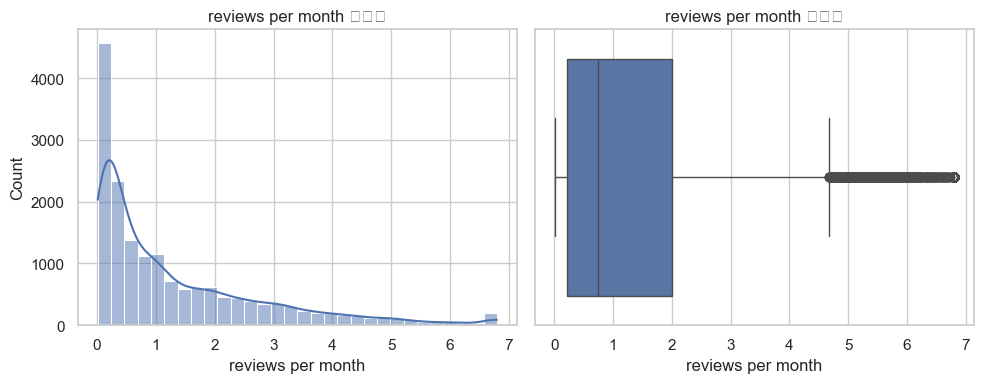

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col = 'reviews per month'

# 1️⃣ 基本统计信息
print(f"\n=== {col} 基本统计 ===")
print(df[col].describe())

# 2️⃣ 缺失值情况
missing_count = df[col].isna().sum()
print(f"\n{col} 缺失值数量: {missing_count}")

# 3️⃣ 查看负值或异常值
negative_count = (df[col] < 0).sum()
print(f"{col} 负值数量: {negative_count}")

# 4️⃣ 可视化分布
plt.figure(figsize=(10,4))

# 直方图
plt.subplot(1,2,1)
sns.histplot(df[col], bins=30, kde=True)
plt.title(f'{col} 直方图')

# 箱线图
plt.subplot(1,2,2)
sns.boxplot(x=df[col])
plt.title(f'{col} 箱线图')

plt.tight_layout()
plt.show()


In [55]:
missing_summary = df.isna().sum()
print(missing_summary)



host_identity_verified              37
neighbourhood group                  0
neighbourhood                        3
lat                                  1
long                                 1
instant_bookable                    15
cancellation_policy                 13
room type                            0
Construction year                    0
price                                0
service fee                         49
minimum nights                       0
number of reviews                    0
last review                       3223
reviews per month                 3223
review rate number                   0
calculated host listings count       0
availability 365                    70
dtype: int64
